Muhamad Abdulah Ridwan
<br>221351084
<br>PAGI C

In [66]:
import pandas as pd 
import matplotlib.pyplot as plp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [67]:
df = pd.read_csv('heart.csv')

In [68]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,55,High,High,Yes,Low,Overweight,High
1,43,Normal,Normal,No,Moderate,Normal,Low
2,60,High,High,Yes,Low,Obese,High
3,35,Normal,Low,No,High,Normal,Low
4,50,High,High,No,Low,Overweight,Medium


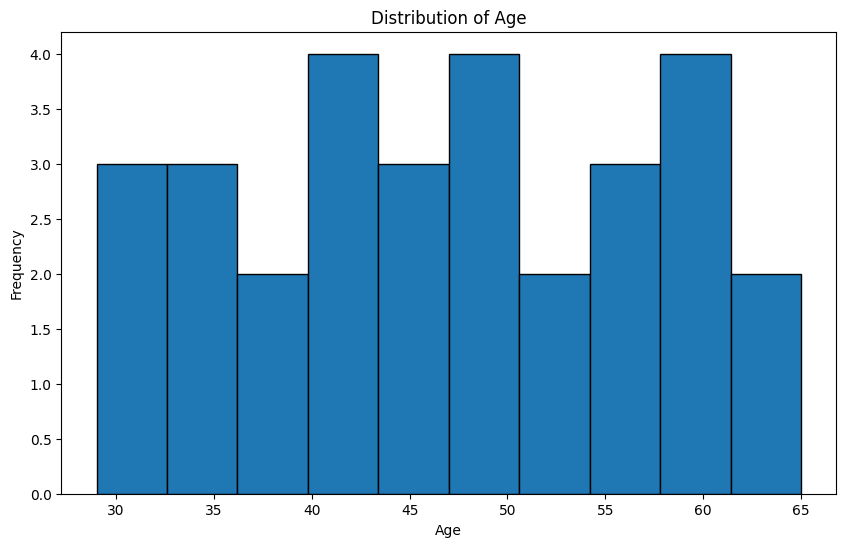

In [69]:
# Histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

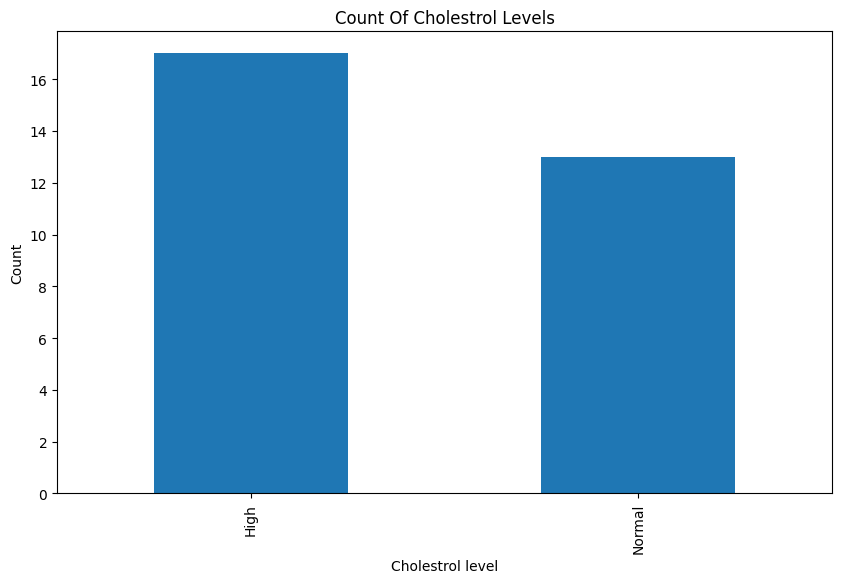

In [70]:
plt.figure(figsize=(10,6))
df['Cholesterol Level'].value_counts().plot(kind='bar')
plt.title("Count Of Cholestrol Levels")
plt.xlabel("Cholestrol level")
plt.ylabel("Count")
plt.show()

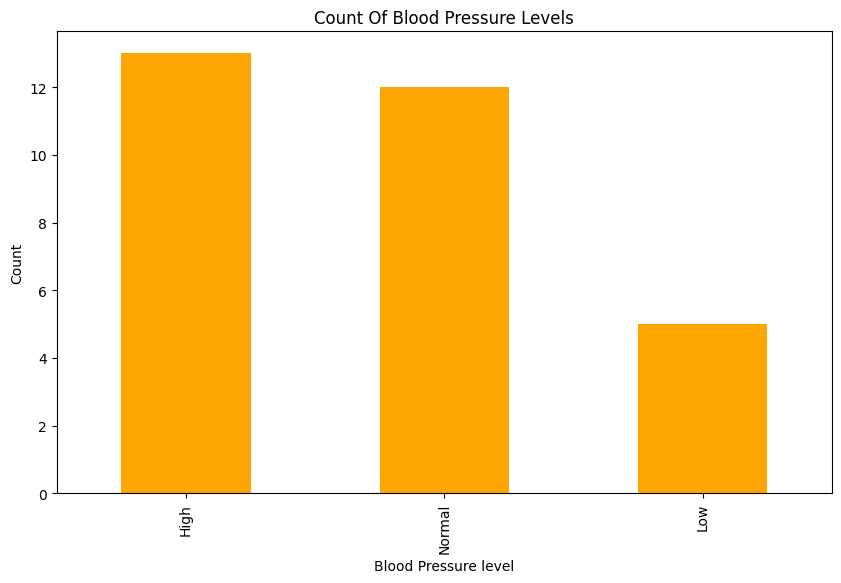

In [71]:
plt.figure(figsize=(10,6))
df['Blood Pressure'].value_counts().plot(kind='bar', color='orange')
plt.title("Count Of Blood Pressure Levels")
plt.xlabel("Blood Pressure level")
plt.ylabel("Count")
plt.show()

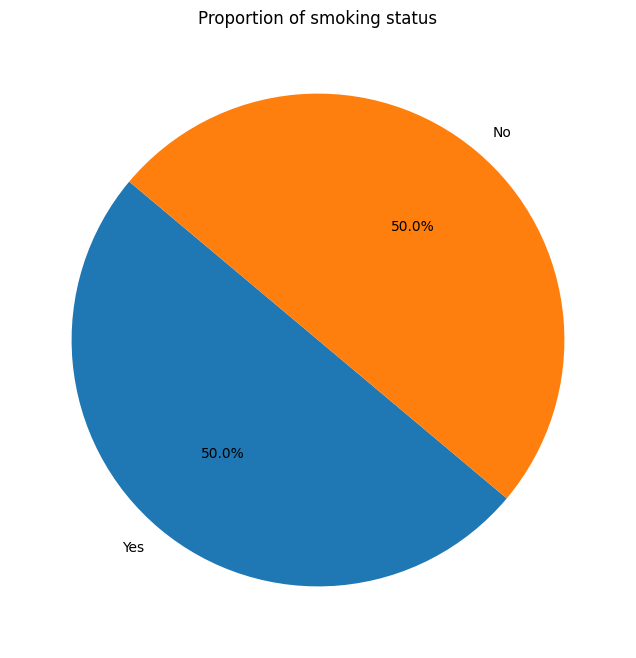

In [72]:
plt.figure(figsize=(8,8))
df['Smoking'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=140)
plt.title("Proportion of smoking status")
plt.ylabel("")
plt.show()

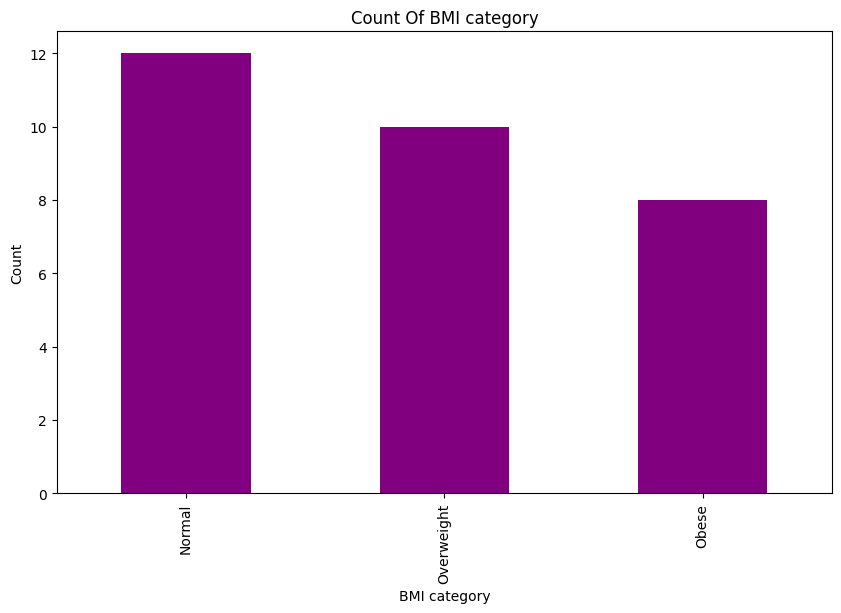

In [73]:
plt.figure(figsize=(10,6))
df['BMI'].value_counts().plot(kind='bar', color='purple')
plt.title("Count Of BMI category")
plt.xlabel("BMI category")
plt.ylabel("Count")
plt.show()

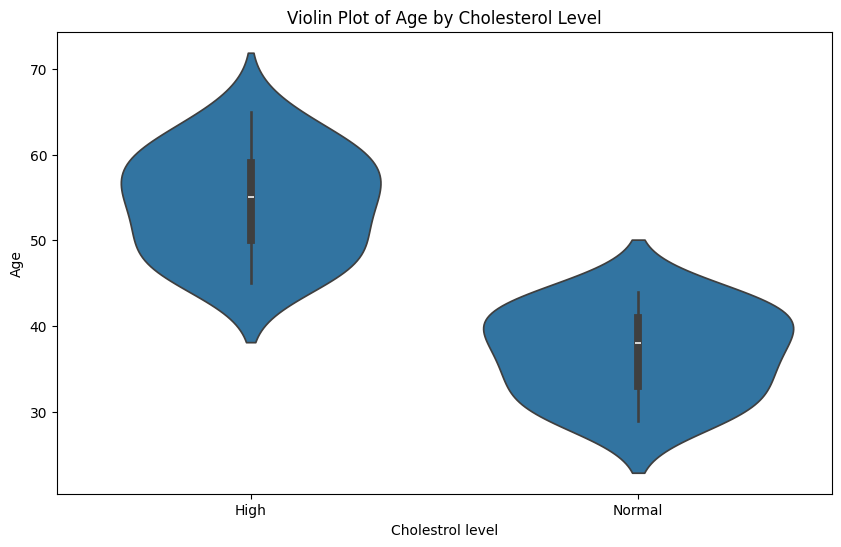

In [74]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Cholesterol Level', y='Age', data=df)
plt.title("Violin Plot of Age by Cholesterol Level")
plt.xlabel("Cholestrol level")
plt.ylabel("Age")
plt.show()

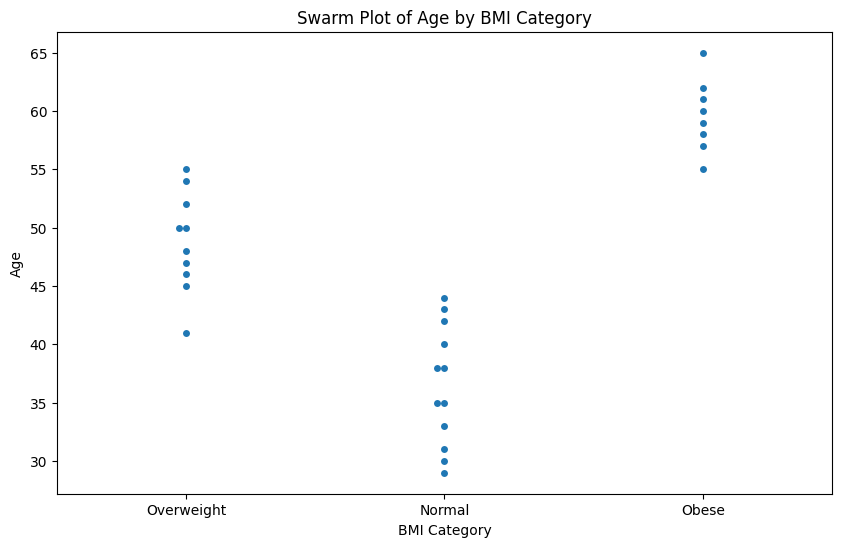

In [75]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='BMI', y='Age', data=df)
plt.title("Swarm Plot of Age by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Age")
plt.show()

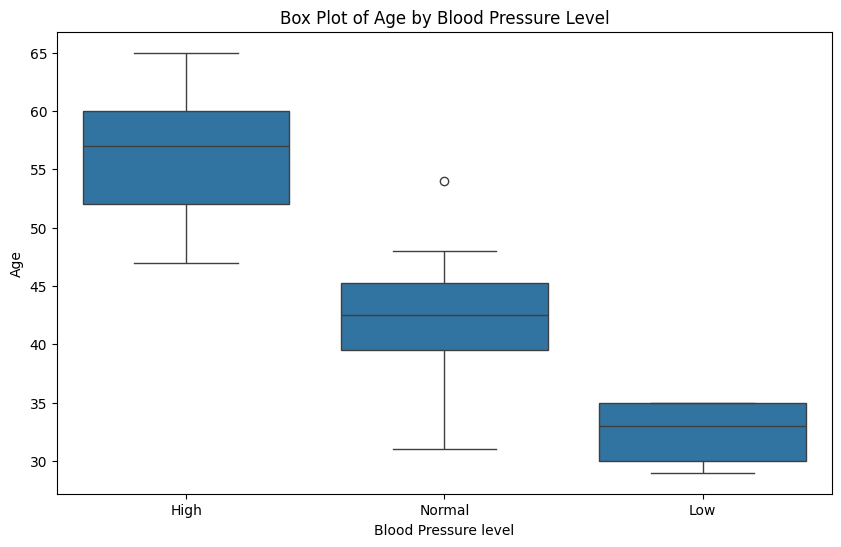

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Blood Pressure', y='Age', data=df)
plt.title("Box Plot of Age by Blood Pressure Level")
plt.xlabel("Blood Pressure level")
plt.ylabel("Age")
plt.show()

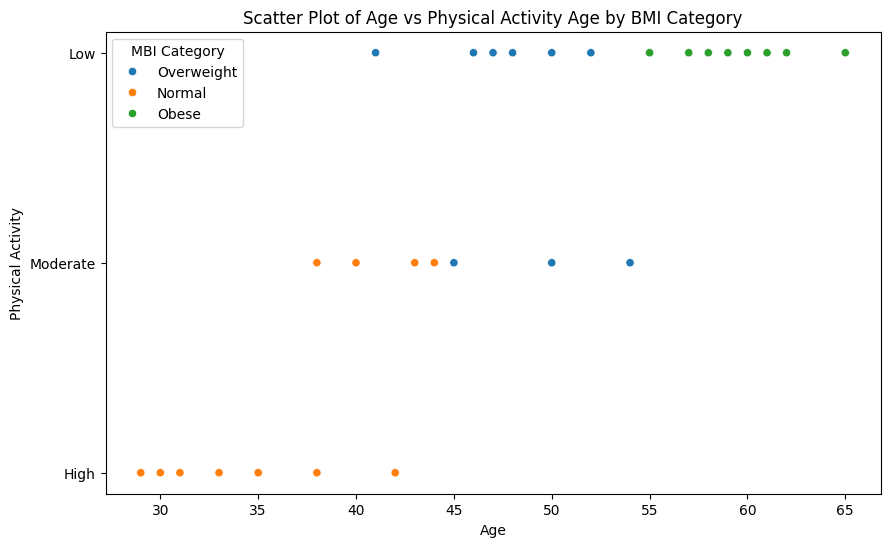

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Physical Activity', hue='BMI')
plt.title("Scatter Plot of Age vs Physical Activity Age by BMI Category")
plt.xlabel("Age")
plt.ylabel("Physical Activity")
plt.legend(title="MBI Category")
plt.show()

In [78]:
def categorize_age(age):
    if age < 35:
        return "Young"
    elif age < 55:
        return "Middle-aged"
    else:
        return "Senior"


In [79]:
df['Age'] = df['Age'].apply(categorize_age)

In [80]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,Senior,High,High,Yes,Low,Overweight,High
1,Middle-aged,Normal,Normal,No,Moderate,Normal,Low
2,Senior,High,High,Yes,Low,Obese,High
3,Middle-aged,Normal,Low,No,High,Normal,Low
4,Middle-aged,High,High,No,Low,Overweight,Medium


In [81]:
label_encoders = {}

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [82]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,1,0,0,1,1,2,0
1,0,1,2,0,2,0,1
2,1,0,0,1,1,1,0
3,0,1,1,0,0,0,1
4,0,0,0,0,1,2,2


In [83]:
X = df.drop('Heart Disease Risk', axis=1)
y = df['Heart Disease Risk']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [85]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
y_pred= model.predict(X_test)

In [87]:
new_data = pd.DataFrame({
'Age' : [label_encoders['Cholesterol Level'].transform(['High'])[0]],
'Cholesterol Level' : [label_encoders['Cholesterol Level'].transform(['High'])[0]],
'Blood Pressure': [label_encoders['Blood Pressure'].transform(['High'])[0]],
'Smoking' : [label_encoders['Smoking'].transform(['Yes'])[0]],
'Physical Activity':[label_encoders['Physical Activity']. transform(['Low'])[0]],
'BMI' : [label_encoders['BMI'].transform(['Overweight'])[0]]
})


In [88]:
new_prediction = model.predict(new_data)


In [89]:
new_prediction_decoded = label_encoders['Heart Disease Risk'].inverse_transform(new_prediction)


In [90]:
new_prediction_decoded

array(['High'], dtype=object)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [92]:
accuracy, conf_matrix


(1.0,
 array([[3, 0, 0],
        [0, 5, 0],
        [0, 0, 1]]))

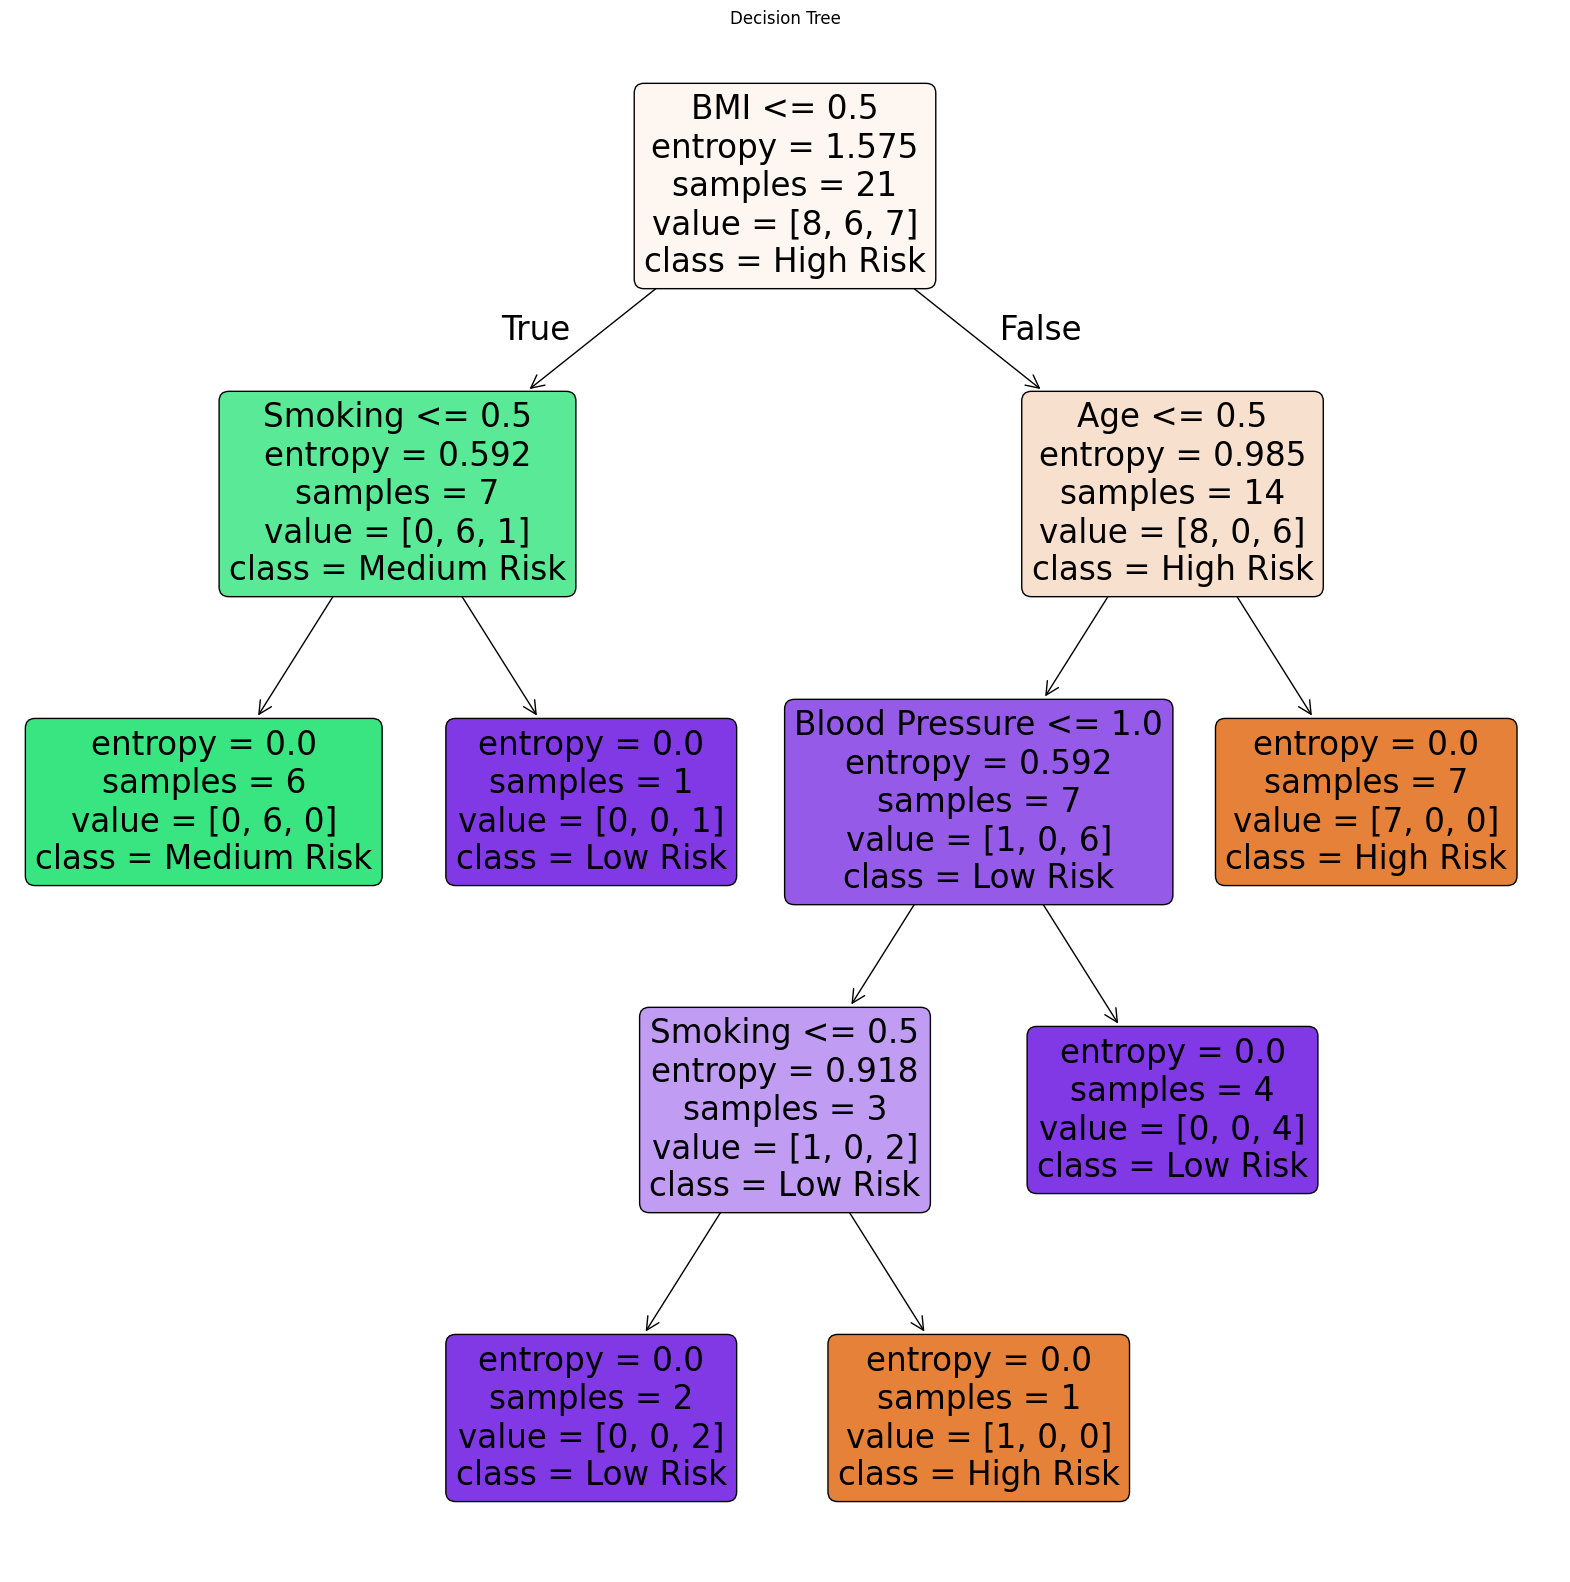

In [95]:

plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=['Age',
                                'Cholesterol Level',
                                'Blood Pressure',
                                'Smoking',
                                'Physical Activity',  # Ensure these are the actual features used
                                'BMI'],  # Add or remove features as needed
          class_names=['High Risk', 'Medium Risk', 'Low Risk'],  # Adjust if necessary
          filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()
